### Test of the network's k-WTA feature

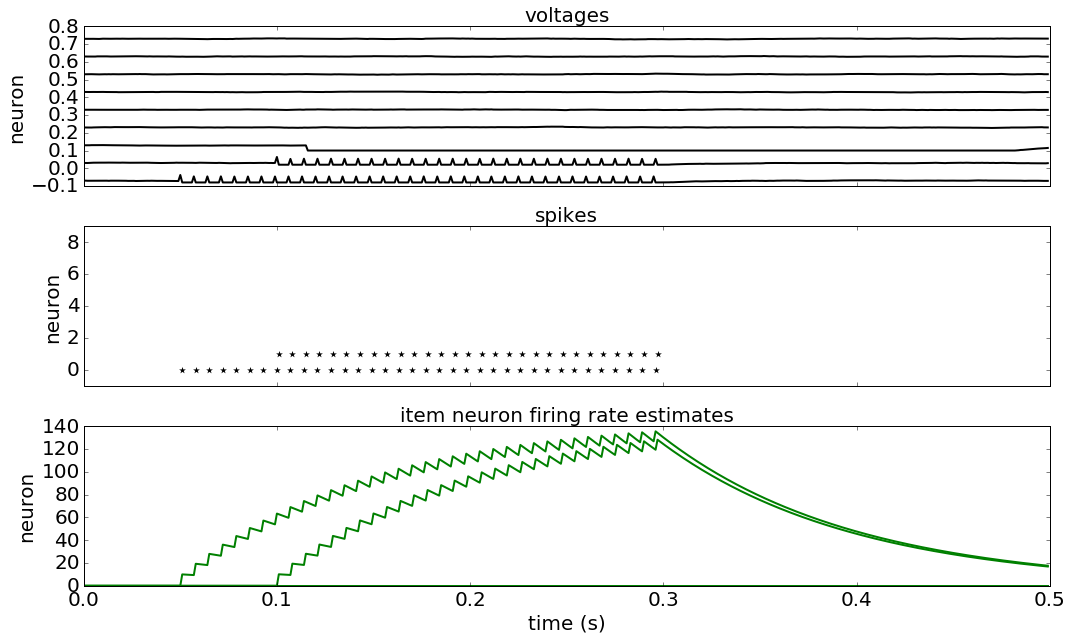

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

W_PA = np.zeros((3, 3))

W_AP = W_PA.T

W_AM = np.zeros((3, 3))
W_MA = np.zeros((3, 3))
W_MM = np.zeros((3, 3))

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:300, 0] = 1
drives['item'][100:300, 1] = 1
drives['item'][150:300, 2] = 1

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Basic associative encoding without memory

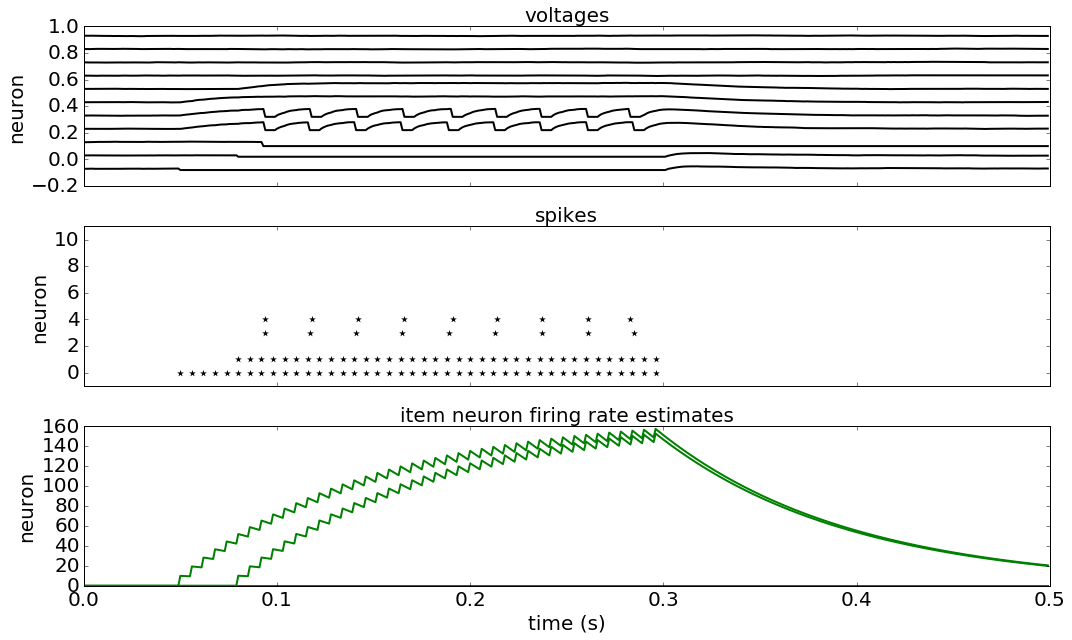

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 5. * temp

W_AP = 1. * temp.T

W_AM = np.zeros((4, 4))
W_MA = np.zeros((4, 4))
W_MM = np.zeros((4, 4))

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:300, 0] = 2
drives['item'][80:300, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Basic associative encoding with memory

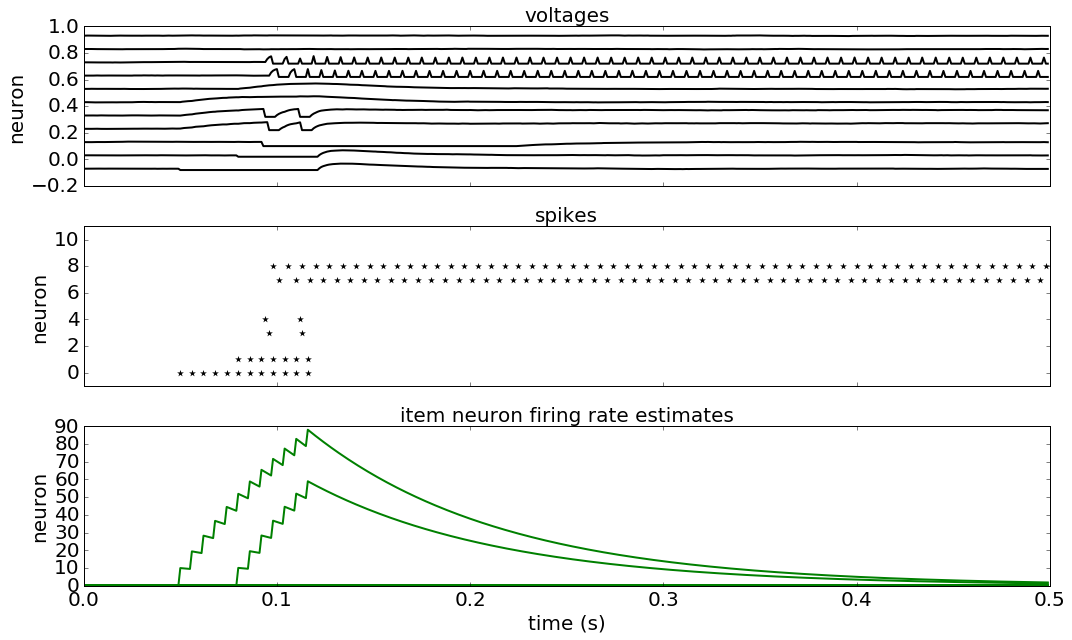

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .1
K_WTA = 2
WTA_TH = 20.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 5. * temp

W_AP = 1. * temp.T

W_AM = np.eye(4)
W_MA = 10 * np.eye(4)
W_MM = 15 * np.eye(4)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 0] = 2
drives['item'][80:120, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

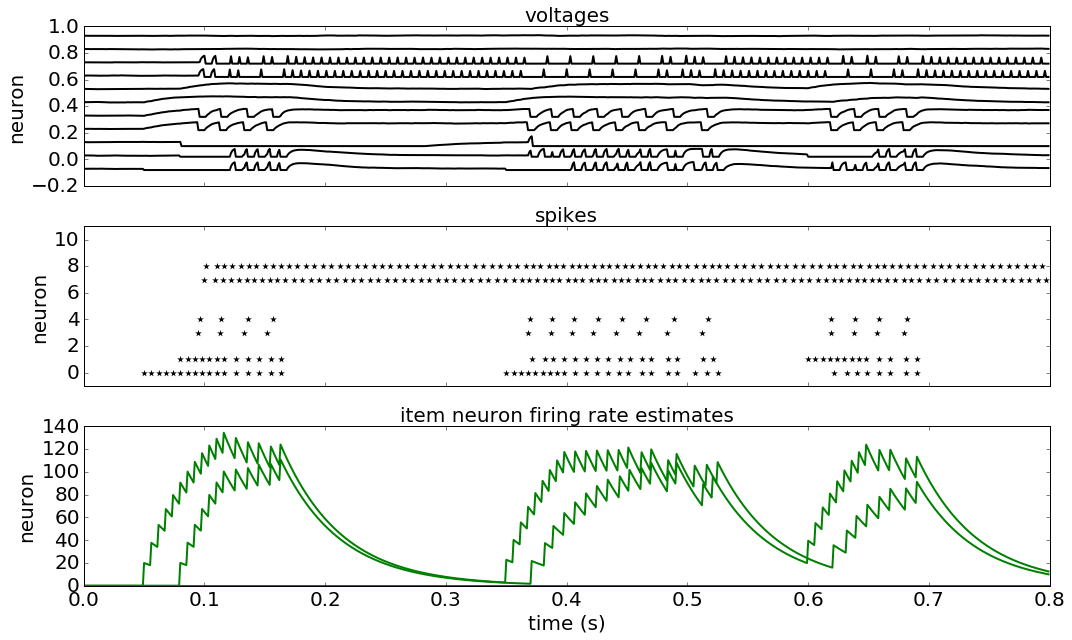

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .05
K_WTA = 2
WTA_TH = 10.
WTA_INH = -.5
NOISE = 0.01

temp = np.array([
    [1., 1, 1, 0],
    [1., 1, 0, 1],
    [1., 0, 1, 1],
])

W_PA = 10. * temp

W_AP = 1. * temp.T

W_AM = np.eye(4)
W_MA = 10 * np.eye(4)
W_MM = 15 * np.eye(4)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 800

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 0] = 2
drives['item'][80:120, 1] = 2

drives['item'][350:400, 0] = 2

drives['item'][600:650, 1] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True, tight_layout=True)

# voltages

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
axs[0].set_ylabel('neuron')
axs[0].set_title('voltages')
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
axs[1].set_ylim(-1, n_neurons)

axs[1].set_ylabel('neuron')
axs[1].set_title('spikes')

for ctr, fre_items in enumerate(results['fre_items'].T):
    
    axs[2].plot(ts, fre_items + .1 * ctr, color='g', lw=2)
    
axs[2].set_xlim(0, n_steps * dt)
axs[2].set_ylabel('neuron')
axs[2].set_title('item neuron firing rate estimates')

axs[2].set_xlabel('time (s)')

for ax in axs:
    
    set_fontsize(ax, 20)

### Test with a lot of neurons

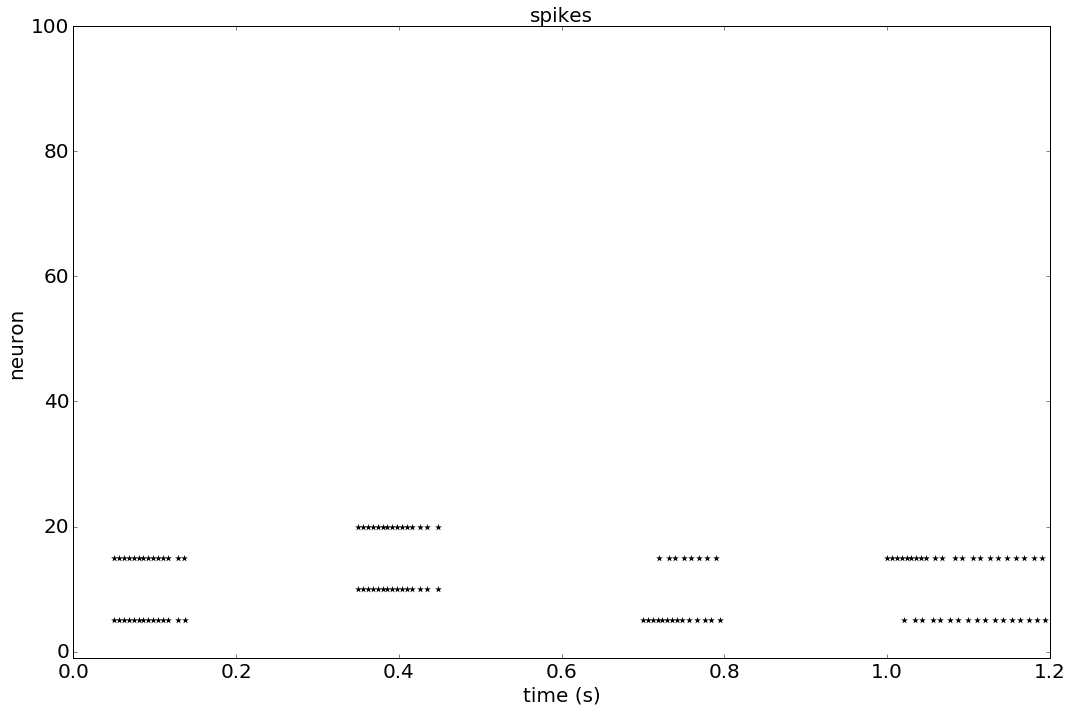

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from network import LIFWithKWTAItems
from plot import set_fontsize

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
V_MIN = -0.1
T_RP = 0.005

V_REV_SYN_EXC = 0.0
TAU_SYN_EXC = 0.01

TAU_FRE = .05
K_WTA = 2
WTA_TH = 10.
WTA_INH = -.5
NOISE = 0.01

N_ITEMS = 100
N_ASSOCS = 500
P_CXN = 0.25

cxn_ap = (np.random.rand(N_ITEMS, N_ASSOCS) < P_CXN).astype(float)

W_PA = .6 * cxn_ap

W_AP = 1. * cxn_ap.T

W_AM = np.eye(N_ASSOCS)
W_MA = 10 * np.eye(N_ASSOCS)
W_MM = 15 * np.eye(N_ASSOCS)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, v_min=V_MIN, t_rp=T_RP,
    v_rev_syn_exc=V_REV_SYN_EXC, tau_syn_exc=TAU_SYN_EXC,
    tau_fre=TAU_FRE, k_wta=K_WTA, wta_th=WTA_TH, wta_inh=WTA_INH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 1200

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][50:120, 5] = 2
drives['item'][50:120, 15] = 2

drives['item'][150:160, :] = -10

drives['item'][350:420, 10] = 2
drives['item'][350:420, 20] = 2

drives['item'][450:460, :] = -10

drives['item'][700:750, 5] = 2

drives['item'][800:810, :] = -10

drives['item'][1000:1050, 15] = 2

v_init = V_REST * np.ones((n_neurons,))
g_init = np.zeros((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, g_init, dt, record=['spikes', 'vs', 'fre_items'])


## MAKE PLOTS

fig, ax = plt.subplots(1, 1, figsize=(15, 10), sharex=True, tight_layout=True)
    
spike_times, spike_idxs = results['spikes'][:, :N_ITEMS].nonzero()

ax.scatter(spike_times * dt, spike_idxs, marker='*', s=50, c='k', lw=0)
ax.set_xlim(0, n_steps * dt)
ax.set_ylim(-1, n_items)

ax.set_ylabel('neuron')
ax.set_title('spikes')

ax.set_xlabel('time (s)')

set_fontsize(ax, 20)